# The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

## Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [274]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing datasets**

In [275]:
data1=pd.read_csv('bigmartdata.train.csv')
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


* __Item_Identifier__ : Unique product ID

* __Item_Weight__ : Weight of product

* __Item_Fat_Content__ : Whether the product is low fat or not

* __Item_Visibility__ : The % of total display area of all products in a store allocated to the particular product

* __Item_Type__ : The category to which the product belongs

* __Item_MRP__ : Maximum Retail Price (list price) of the product

* __Outlet_Identifier__ : Unique store ID

* __Outlet_Establishment_Year__ : The year in which store was established

* __Outlet_Size__ : The size of the store in terms of ground area covered

* __Outlet_Location_Type__ : The type of city in which the store is located

* __Outlet_Type__ : Whether the outlet is just a grocery store or some sort of supermarket

* __Item_Outlet_Sales__ : Sales of the product in the particular store.

**Shape of Datasets**

In [276]:
data1.shape

(8523, 12)

**Description of all column in given Datasets**

In [277]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Some observations:

1. **Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. **Outlet_Establishment_Years** vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

**Data_Types of All Column**

In [278]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### **The goal of this project was to use EDA, visualization, data cleaning, preprocessing, andvarious MLmodels to predict item_outlet_sales  given the features of the Big_mart datesets, and interpret yourML models to find out what features add value to a big_mart analysis**

# **Data Description**

### **The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas.Data are collected on 12 different properties of the big_mart sales analysis ,all data is on properties of the big_mart**

# **Data cleaning on the datasets**

**This step typically involves imputing missing values and treating outliers. Though outlier removal is very important in regression techniques, advanced tree based algorithms are impervious to outliers**

**Checking total missing or Null values**

In [279]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item.**

In [280]:

#imputing missing values

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='mean')
data1['Item_Weight']=imp.fit_transform(data1['Item_Weight'].values.reshape(-1,1))

data1['Item_Weight'].isnull().any()

False

In [281]:
data1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**By doing this we will put that value in missing place of particular column  which having highest  occupation in that column**

In [282]:
imp=SimpleImputer(strategy='most_frequent')
data1['Outlet_Size']=imp.fit_transform(data1['Outlet_Size'].values.reshape(-1,1))

data1['Outlet_Size'].isnull().any()

False

**After filing all missing place of the datasets,summation of all Null value will be zero**

In [283]:
data1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**isna function show that is there any missing value or not,if it is there it show True,otherwise false**

<AxesSubplot:>

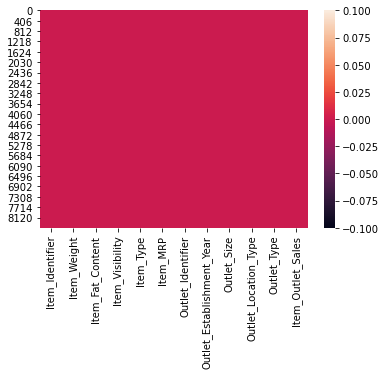

In [284]:
sns.heatmap(data1.isnull())

In [285]:
data1['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDO19     9
NCB18     9
FDP25     9
         ..
FDY43     1
FDC23     1
FDT35     1
FDO33     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [286]:
data1['Item_Identifier'] = data1['Item_Identifier'].apply(lambda x: x[0:2])

data1['Item_Identifier'] = data1['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data1['Item_Identifier'].value_counts()


Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

In [287]:
data1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [288]:
data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

data1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# **EDA REPORT ON THE  BIG_MART DATASETS**

# UNIVARIATE ANALYSIS

**Uni means one. Univariate means one variable analysis. The key pointers to the Univaraite analysis are to find out the outliers present in the data. We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.**

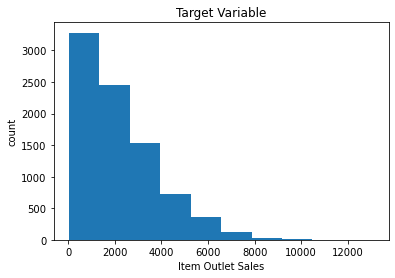

In [289]:
plt.hist(data1['Item_Outlet_Sales'], bins = 10)
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

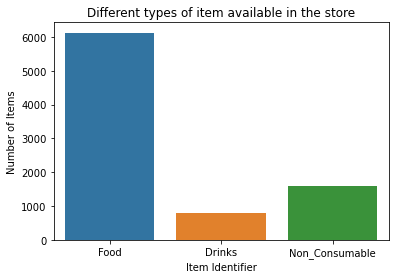

In [290]:
#data1['Item_Identifier'].value_counts()
#data1['Item_Identifier'].value_counts().plot.count()
sns.countplot(data1['Item_Identifier'])
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')

plt.show()

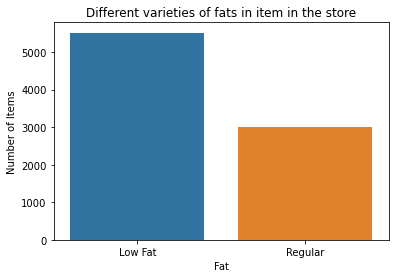

In [291]:
sns.countplot(data1['Item_Fat_Content'])
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

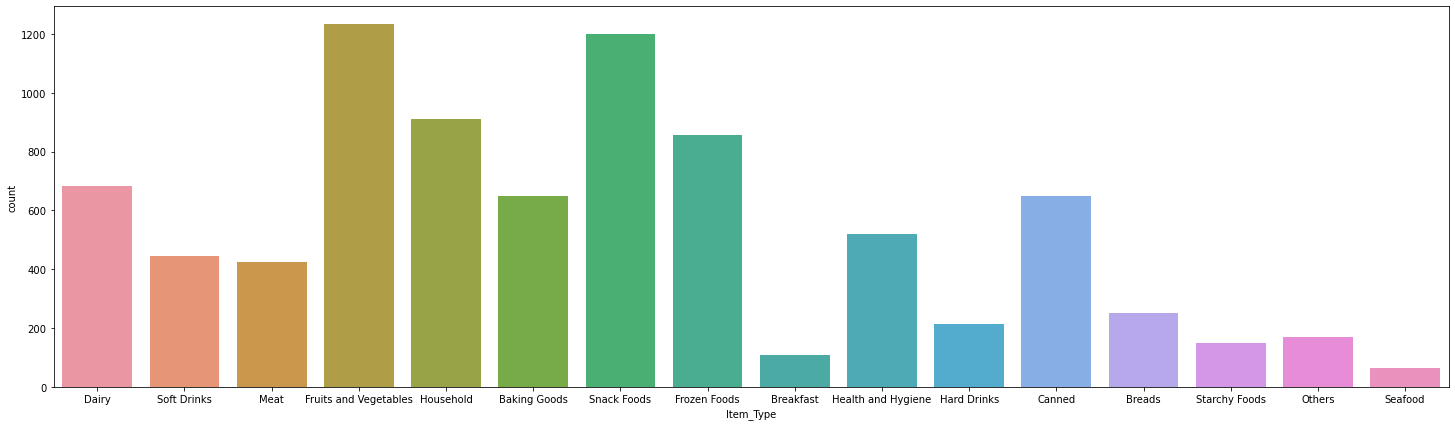

In [292]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=data1)
plt.show()

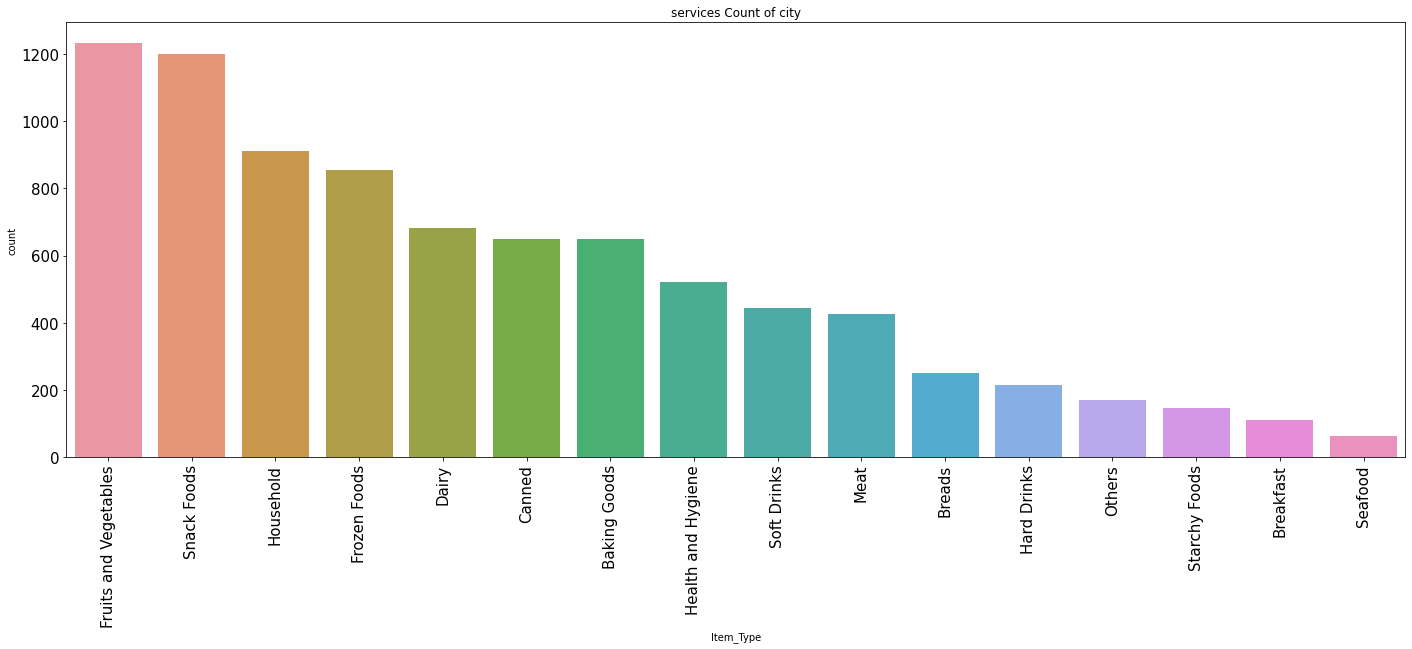

In [293]:
#count by Services

plt.subplots(figsize=(24,8))
sns.countplot(x='Item_Type',data=data1,order=data1['Item_Type'].value_counts().index)
plt.title('services Count of city')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#print(data['Item_Type'].value_counts())

* From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc

* Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

**<1>Distplot on Item_wieght
The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).**


**Description about distplot of column=Item_Weight
<1>. This plot show that the Item_weight near 12.5 having more number of product
<2>. it also show that item_weight near 5 is having less number of product 

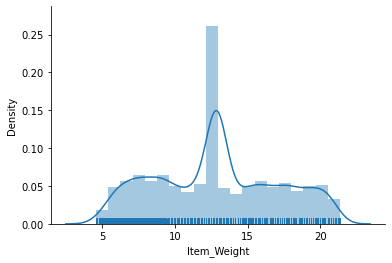

In [294]:
sns.distplot(data1['Item_Weight'],bins=20,rug=True,kde=True)
sns.despine()

This same as prevoius dist plot different is that in this case hist=False this show that histogram part will be absent
Description about distplot of column=Item_Weight

<1>. This plot show that the Item_weight between 10-15 there is one is point having more number of product

<2>. it also show that item_weight near 5 is having less number of product

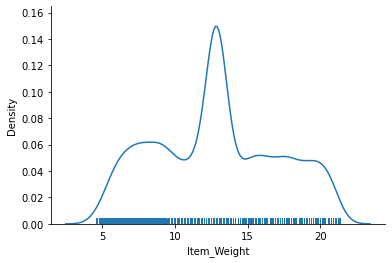

In [295]:
sns.distplot(data1['Item_Weight'],hist=False,rug=True)
sns.despine()

### **countplot on column=Item_Fat_content**


**Description about this plot**
<1> This plot show that whose item_fat_content is low fat having highest no of count
<2> There are few points which seem to be minor outliers as compare to other

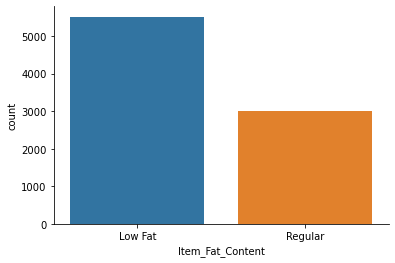

In [296]:
sns.countplot(x='Item_Fat_Content',data=data1)
sns.despine()

**kernel desnsity estimation plot on column=item_outlet_sales**

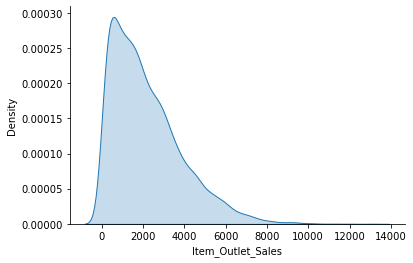

In [297]:
sns.kdeplot(data1['Item_Outlet_Sales'],shade=True)
sns.despine()

Description about distplot of column=Item_Outlet_Sales

* This plot show that the Item_Outlet_sales have one point which are at peak point

* This graph have less no of outliers in right side

* Hence from the above graph we can observe that Item_Outlet_Sales feature is positively skewed

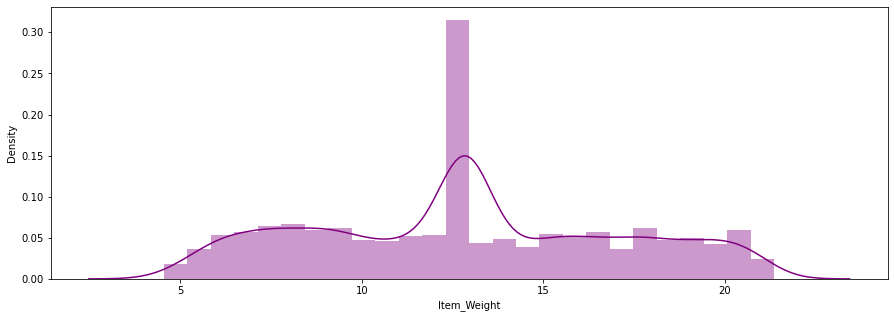

In [298]:
# Item_Weight distribution
plt.figure(figsize=(15,5))
sns.distplot(data1['Item_Weight'], color='purple')
plt.show()

* Hence from the above graph we can observe that we have the item weight from 5 Kg to 20 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

In [299]:
data1['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

**some observation are**
1. year between 1990 to 1995 graph show less no of count
2.  it show highest no of count at 1985

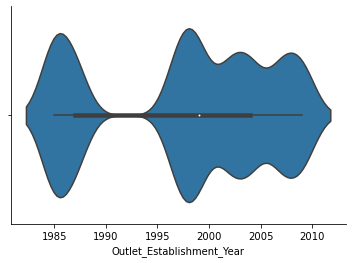

In [300]:
sns.violinplot(x='Outlet_Establishment_Year',data=data1)
sns.despine()

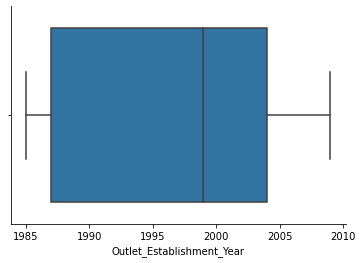

In [301]:
sns.boxplot(x='Outlet_Establishment_Year',data=data1)
sns.despine()

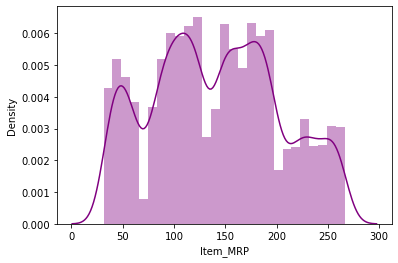

In [302]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.distplot(data1['Item_MRP'], color='purple')
plt.show()

* From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products


* Hence we have more products in the range of 100 MRP - 180 MRP

**unique function** show the toatl no of unique object present in particular column or whole datasets

In [303]:
data1.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [304]:
data1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

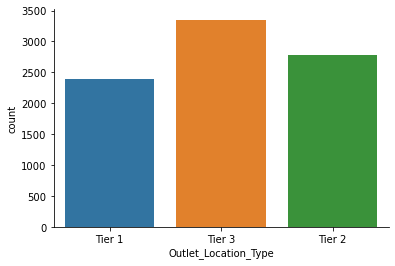

In [305]:
sns.countplot(data1.Outlet_Location_Type	,data=data1)
sns.despine()

(array([451., 472., 415., 158., 477., 576., 620., 628., 295., 509., 580.,
        518., 622., 578., 227., 253., 303., 254., 271., 316.]),
 array([ 31.29   ,  43.06992,  54.84984,  66.62976,  78.40968,  90.1896 ,
        101.96952, 113.74944, 125.52936, 137.30928, 149.0892 , 160.86912,
        172.64904, 184.42896, 196.20888, 207.9888 , 219.76872, 231.54864,
        243.32856, 255.10848, 266.8884 ]),
 <BarContainer object of 20 artists>)

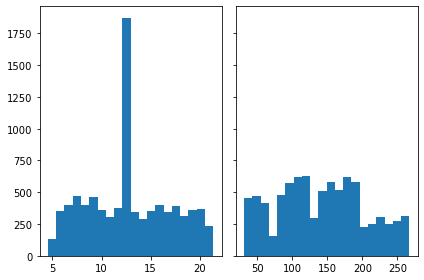

In [306]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(data1['Item_Weight'], bins=20)
axs[1].hist(data1['Item_MRP'], bins=20)


# **Bivariate analysis**

**It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.**

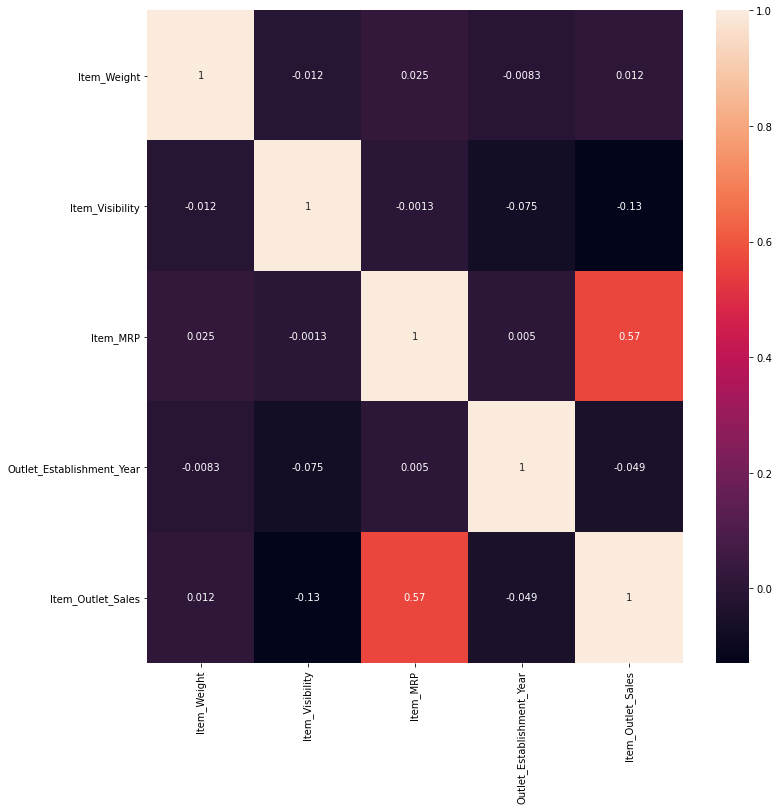

In [307]:
plt.figure(figsize =(12,12))
sns.heatmap(data1.corr(),annot=True)
plt.show()

**Relationship between item MRP and item outlet sales**

**some description about this**
1. correlation between Item_MRP and Item_Outlet_sales =0.57
2. some item having Item_mrp lies betwwen 200 to 250 have highest no of count of item_outlet_sales

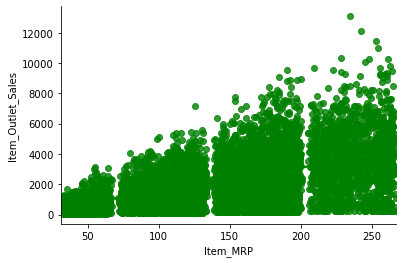

In [308]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=data1,color='g')
sns.despine()

**Jointplot**=>It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

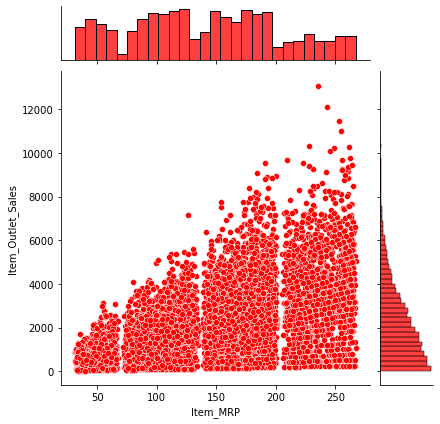

In [309]:


sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=data1,color='r')
sns.despine()

**use of KDE in jointplot**=>It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot():

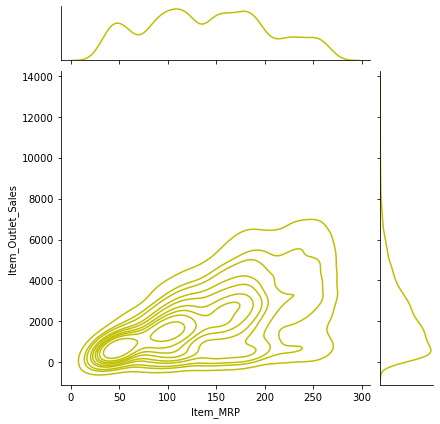

In [310]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=data1,kind='kde',color='y')
sns.despine()

**some observation are**
1. correlation between Item_visibility and Item_Outlet_sales=-0.13
2. There are few points which seem to be minor outliers

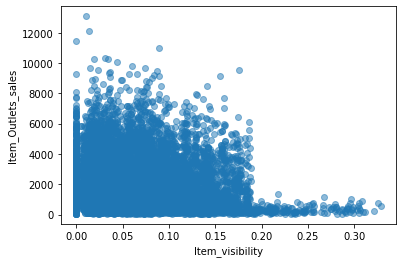

In [311]:
plt.scatter(data1.Item_Visibility, data1.Item_Outlet_Sales, alpha=.5)
plt.xlabel('Item_visibility')
plt.ylabel('Item_Outlets_sales')
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

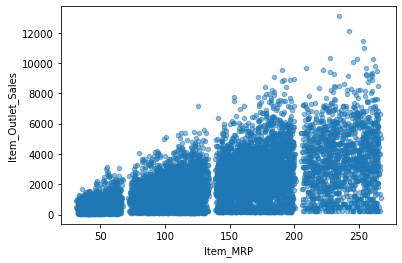

In [312]:
data1.plot(kind='scatter', x = 'Item_MRP', y = 'Item_Outlet_Sales', alpha=.5)

__Observation:

1. item_mrp and Item_outlet_sales having highest correlation=0.57
2. Item having price range between 200-250 have highest no of outlet_Sales
3. price range b/w 0-50 have dense area 

# **Multivariant analysis**

Description about thsi graph

<1>. This plot show that the item_mrp having 0-50 having less no of outlet sales

<2>. it also show that mrp having 200-250 have largest no of outlet sales

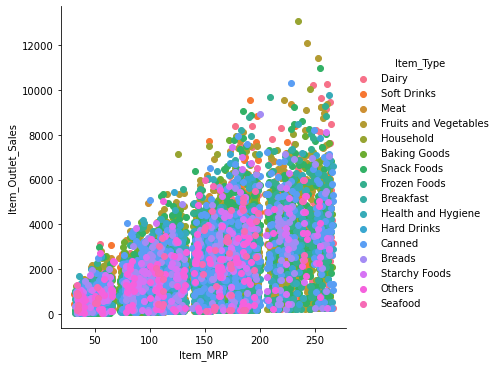

In [313]:
sns.lmplot(x = 'Item_MRP' , y = 'Item_Outlet_Sales' , hue='Item_Type',data=data1 ,scatter_kws={'alpha':1}, fit_reg = False)
sns.despine()

# **Feature Enginnering**

**We explored some mistake in the data in the data exploration section. Lets move on to resolving them and making our data ready for analysis. We will also create some new variables using the existing ones in this section**

In [314]:
data1.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [315]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 


list=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    data1[val]=le.fit_transform(data1[val].astype(str))
    
data1


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,Drinks,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,Food,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,Food,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,Non_Consumable,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Food,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,Food,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,Non_Consumable,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,Food,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [316]:
#dropping item identifier
data1=data1.drop('Item_Identifier',axis=1)

In [317]:
data1.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [318]:
data1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [319]:
data1.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

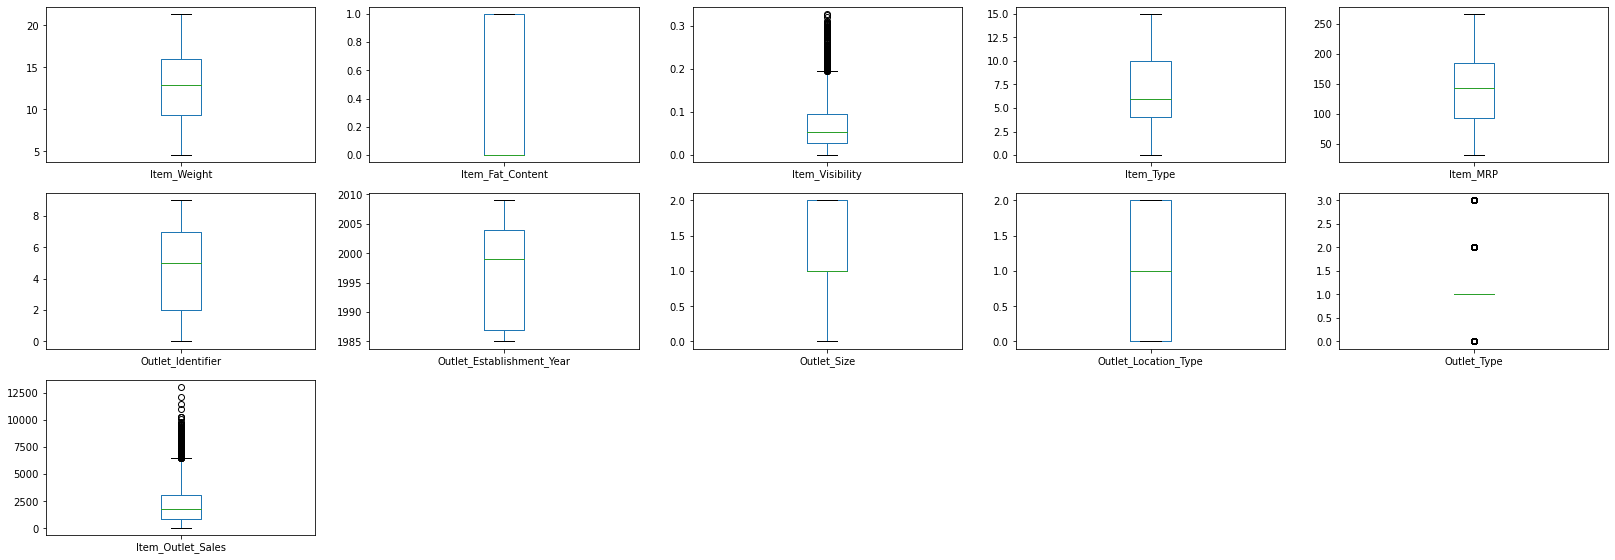

In [320]:
#checking outliers
data1.plot(kind='box',subplots=True,layout=(6,5),figsize=(28,20))
plt.show()

In [321]:
#removing outliers

from scipy.stats import zscore
z_score=abs(zscore(data1))
print(data1.shape)
df_new=data1.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(8523, 11)
(8338, 11)


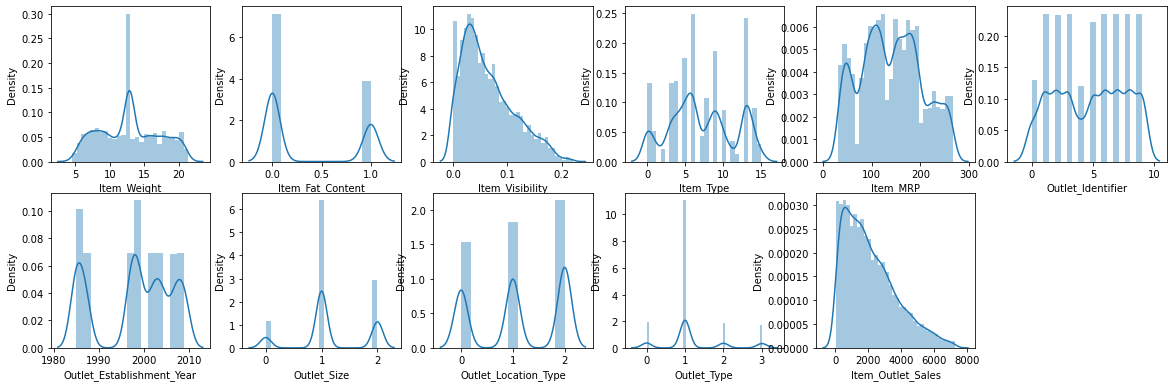

In [322]:
col=data1.columns.values
nrows=6
ncol=6

plt.figure(figsize=(20,20))
for i in range(0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[col[i]])

In [323]:
#Let's check the skewness of our DataSet

df_new.skew()

Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

In [325]:
# Let's treat the skewness

for col in df_new.columns:
    if df_new[col].skew()>0.55:
        df_new[col]=np.log1p(df_new[col])

# Model Building

## spliting the data into input(x) and output(y) variable

In [326]:
x=data1.iloc[:,:-1]
y=pd.DataFrame(data1['Item_Outlet_Sales'])

In [327]:
# checking the shape of input & target variable
print(x.shape)
print(y.shape)

(8523, 10)
(8523, 1)


In [328]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [329]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42)

In [330]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (6818, 10)
x_test_shape: (1705, 10)
y_train_shape: (6818, 1)
y_test_shape: (1705, 1)


In [331]:
#Importing all the model library

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing boosting model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

#import error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [332]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    r2_scr=r2_score(y_test,lg_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)

max r2 score corresponding to  76 is 0.5371877242197356


In [141]:
#using GridsearchCV to find the best parmeter in  KNeighborsRegressor
parameters={'n_neighbors':range(20,30),'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute')}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 22}


In [142]:
#using GridsearchCV to find the best parmeter in  DecisionTreeRegressor

parameters={'criterion':('mse', 'friedman_mse', 'mae'),'splitter' : ("best", "random"),'random_state':range(42,100)}
dtc=DecisionTreeRegressor()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'mse', 'random_state': 88, 'splitter': 'random'}


In [143]:
#gridsearchcv for SVR
parameters={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [144]:
#gridsearchcv for GradientBoostingRegressor
parameters={'learning_rate':[0.001,0.01,0.1,1],'subsample':[0.9,0.5,0.2,0.1],'n_estimators':[100,300,500,1000],'max_depth':[4,6,8,10]}
gbr=GradientBoostingRegressor()

clf=GridSearchCV(gbr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}


In [145]:
#gridsearchcv for RandomForestRegressor
parameters={'bootstrap': [True, False],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'n_estimators': [10,20,30,40,50,100]}
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=66)

In [242]:
#models with is best parameters
lg= LinearRegression()
#ridge=Ridge(alpha= 1, random_state= 42)
#lasso=Lasso(alpha= 1, random_state= 42)
knn=KNeighborsRegressor(algorithm= 'auto', n_neighbors= 23)
svr=SVR(C= 1, kernel= 'rbf')
dtc=DecisionTreeRegressor(criterion= 'mse', random_state= 88, splitter='random')
rfr=RandomForestRegressor(bootstrap= True, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 10, n_estimators= 100)
#XGB = xgb.XGBRegressor(base_score= 0.5, booster= 'gblinear')
gbr=GradientBoostingRegressor(learning_rate=0.01, max_depth= 4, n_estimators= 500, subsample=0.5)

In [334]:
#All Algorithm by using for loop

model=[lg,knn,svr,dtc,
       rfr,gbr]
rmse = []
cvs=[]
r2score=[]
mse=[]
mae=[]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of ',m,'is',score)
    r2s=r2_score(y_test,predm)
    print("r2 score is: ",r2s)
    r2score.append(r2s)
    MAE=mean_absolute_error(y_test,predm)
    print("Mean_absolute_error: ",MAE)
    mae.append(MAE)
    MSE=mean_squared_error(y_test,predm)
    print("Mean_squared_error: ",MSE)
    mse.append(MSE)
    rmse1=np.sqrt(MSE)
    print("root Mean squared error: ",rmse1)
    rmse.append(rmse1)
    print('*****************************************************************************************')
    print('\n')

score of  LinearRegression() is 0.5052445210118834
r2 score is:  0.527778110856611
Mean_absolute_error:  900.9709368724575
Mean_squared_error:  1462780.9776406395
root Mean squared error:  1209.4548266225736
*****************************************************************************************


score of  KNeighborsRegressor(n_neighbors=23) is 0.6015928870499629
r2 score is:  0.5808957296132963
Mean_absolute_error:  816.380581022568
Mean_squared_error:  1298240.8661354447
root Mean squared error:  1139.4037327196381
*****************************************************************************************


score of  SVR(C=1) is 0.06213482184896446
r2 score is:  0.045068735872631716
Mean_absolute_error:  1261.2867104755023
Mean_squared_error:  2958048.578929156
root Mean squared error:  1719.8978396780303
*****************************************************************************************


score of  DecisionTreeRegressor(random_state=88, splitter='random') is 1.0
r2 score is:  

In [335]:
result = pd.DataFrame({'Model': model, 'r2_score':r2score,'Mean_absolute_error':mae,'Mean_squared_error':mse,'root_mean_squared_error':rmse})
result

,Model,r2_score,Mean_absolute_error,Mean_squared_error,root_mean_squared_error
0,LinearRegression(),0.527778,900.970937,1.462781e+06,1209.454827
1,KNeighborsRegressor(n_neighbors=23),0.580896,816.380581,1.298241e+06,1139.403733
2,SVR(C=1),0.045069,1261.286710,2.958049e+06,1719.897840
3,"DecisionTreeRegressor(random_state=88, splitte...",0.189511,1105.108117,2.510615e+06,1584.492031
4,"(DecisionTreeRegressor(max_features='sqrt', mi...",0.601221,780.750286,1.235281e+06,1111.431814
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.610551,774.428769,1.206379e+06,1098.352714


In [337]:
#cross validate the models
from sklearn.model_selection import cross_val_score
model=[lg,knn,svr,dtc,
       rfr,gbr]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of ',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('******************************************************')
    print('\n')

score of  LinearRegression() is:
score: [0.52834551 0.50527646 0.48959349 0.50902077 0.50874079]
mean score: 0.5081954032846218
standard deviation: 0.012341449816084381
******************************************************


score of  KNeighborsRegressor(n_neighbors=23) is:
score: [0.57101569 0.56147783 0.5575815  0.55945365 0.58560413]
mean score: 0.5670265609809026
standard deviation: 0.010376762950797135
******************************************************


score of  SVR(C=1) is:
score: [0.05021098 0.07013519 0.04763349 0.05859448 0.06489046]
mean score: 0.05829292176198875
standard deviation: 0.008518203582487952
******************************************************


score of  DecisionTreeRegressor(random_state=88, splitter='random') is:
score: [0.26188227 0.11749804 0.11092493 0.23462032 0.13888084]
mean score: 0.17276128130133234
standard deviation: 0.0629201653121171
******************************************************


score of  RandomForestRegressor(max_features='sqrt

### For this study, we employed the Root Mean Squared Error (RMSE) metric. For regression issues, the RMSE is the most widely used evaluating approach. Because of the square root's power,this measure has a lot of variances in percentages. The squared feature of this measure tends to produce moreconsistent results by preventing the cancellation of positive and negative error values.

### Various machine learning algorithms like Linear Regression, Random Forest, Decision Tree,SVR,Kneighbors,Gradientboosting have been built to predict the sales revenue of Big Mart. It’s been found that the most efficient algorithm to predict the sales revenue of Big mart is observed with Gradient Boosting algorithms having the least RMSE value among other algorithms. 

## From above observation we take Gradient Boosting Regressor as the final model

In [338]:
features= ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
coef3 = pd.Series(gbr.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                     0.529277
Outlet_Type                  0.358301
Outlet_Establishment_Year    0.058546
Item_Visibility              0.022059
Item_Weight                  0.013851
Item_Type                    0.008619
Outlet_Identifier            0.005545
Outlet_Size                  0.001553
Item_Fat_Content             0.001322
Outlet_Location_Type         0.000927
dtype: float64

<AxesSubplot:title={'center':'Feature Importances'}>

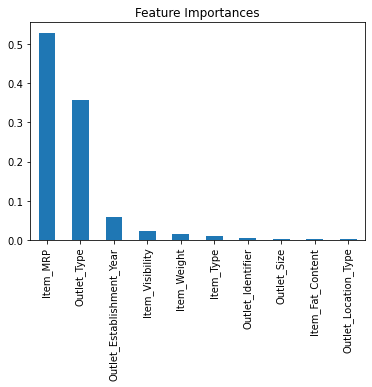

In [339]:
#plt.figure(figsize=(8,5))
#sns.barplot(gbr.feature_importances_,features)
coef3 = pd.Series(gbr.feature_importances_, features).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

### Outlet Type being SuperMarket or Grocery Store  clearly maximises the Outlet sales.

### Item_MRP also depicts the Outlet Sales.

### Years Established will also tend to have loyal customers and that's how the sales margin can be acheived.

In [340]:
import joblib
joblib.dump(gbr,'bigdatamart.pkl')

['bigdatamart.pkl']

# Loading the test dataset

In [341]:
data=pd.read_csv('bigdatamart.test.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


##### Perfoming all the preprocessing steps as performed on training data

In [342]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [343]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='mean')
data['Item_Weight']=imp.fit_transform(data['Item_Weight'].values.reshape(-1,1))

data['Item_Weight'].isnull().any()

False

In [344]:
imp=SimpleImputer(strategy='most_frequent')
data['Outlet_Size']=imp.fit_transform(data['Outlet_Size'].values.reshape(-1,1))

data['Outlet_Size'].isnull().any()

False

In [345]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

data['Item_Identifier'] = data['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

data['Item_Identifier'].value_counts()


Food              4076
Non_Consumable    1087
Drinks             518
Name: Item_Identifier, dtype: int64

In [346]:

data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [347]:
#encoding

list=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    data[val]=le.fit_transform(data[val].astype(str))
    
data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Food,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,Food,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,Non_Consumable,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,Food,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,Food,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,Food,10.500000,1,0.013496,13,141.3154,8,1997,2,0,1
5677,Food,7.600000,1,0.142991,15,169.1448,3,2009,1,2,2
5678,Non_Consumable,10.000000,0,0.073529,8,118.7440,7,2002,1,1,1
5679,Food,15.300000,1,0.000000,3,214.6218,2,2007,1,1,1


In [348]:
data=data.drop('Item_Identifier',axis=1)

In [349]:
#removing outliers

from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
df_new=data.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(5681, 10)
(5600, 10)


In [350]:
# Let's treat the skewness

for col in data.columns:
    if df_new[col].skew()>0.55:
        df_new[col]=np.log1p(df_new[col])

In [351]:
#scaling the test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_new=sc.fit_transform(df_new)

In [352]:
#predicting test dataset
model = joblib.load('bigdatamart.pkl')
price = model.predict(df_new)
print(price)

[1602.22022931 1362.8840624   661.35563293 ... 1891.7774999  3642.71276823
 1277.14749335]
